# Pratical Implementation of Logistic Regression 

In [ ]:
# it is a part of classification 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# logistic regreesion till now we have studied , with two values of target variable>> binary classificatio

In [11]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [15]:
# what is ML pipeline
# 1. data ingetion
# 2. EDA / FE
# 2. Data preperation
# 4. split into x (IV) and y (DV)
# 5. train test split
# 6. scalling (optional)
# 7. Modelling >> model creation and traning
# 8. Evalution of model >> model testing

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [18]:
df.sample(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
139,6.9,3.1,5.4,2.1,2
123,6.3,2.7,4.9,1.8,2


In [22]:
df.target.unique()

array([0, 1, 2])

In [26]:
# for binary classification >> only two class will filter out class 2

df1 = df[df['target'] != 2]
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [27]:
df1.target.unique()

array([0, 1])

In [35]:
x = df.iloc[:, :-1]  # seperation of x and y
y = df.iloc[:, -1]

In [36]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [37]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [38]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

In [39]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
2,4.7,3.2,1.3,0.2
73,6.1,2.8,4.7,1.2
97,6.2,2.9,4.3,1.3
62,6.0,2.2,4.0,1.0
19,5.1,3.8,1.5,0.3
...,...,...,...,...
75,6.6,3.0,4.4,1.4
9,4.9,3.1,1.5,0.1
72,6.3,2.5,4.9,1.5
12,4.8,3.0,1.4,0.1


In [41]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
80,5.5,2.4,3.8,1.1
84,5.4,3.0,4.5,1.5
33,5.5,4.2,1.4,0.2
81,5.5,2.4,3.7,1.0
93,5.0,2.3,3.3,1.0
17,5.1,3.5,1.4,0.3
36,5.5,3.5,1.3,0.2
82,5.8,2.7,3.9,1.2
69,5.6,2.5,3.9,1.1
65,6.7,3.1,4.4,1.4


In [42]:
y_train

2     0
73    1
97    1
62    1
19    0
     ..
75    1
9     0
72    1
12    0
37    0
Name: target, Length: 80, dtype: int64

In [43]:
y_test

80    1
84    1
33    0
81    1
93    1
17    0
36    0
82    1
69    1
65    1
92    1
39    0
56    1
52    1
51    1
32    0
31    0
44    0
78    1
10    0
Name: target, dtype: int64

In [44]:
# model creation
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [46]:
classifier.fit(x_train, y_train)  # trained model

LogisticRegression()

In [47]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [53]:
classifier.predict_proba(x_test)   # range of predicted class 0 and 1 
# corresponding to higher probability class is predicted, cutoff is 0.5 

array([[0.04043262, 0.95956738],
       [0.01046123, 0.98953877],
       [0.98706759, 0.01293241],
       [0.05440516, 0.94559484],
       [0.1383348 , 0.8616652 ],
       [0.97966131, 0.02033869],
       [0.98204504, 0.01795496],
       [0.03292232, 0.96707768],
       [0.03380573, 0.96619427],
       [0.00850516, 0.99149484],
       [0.02466034, 0.97533966],
       [0.97515854, 0.02484146],
       [0.00517837, 0.99482163],
       [0.00238366, 0.99761634],
       [0.0077453 , 0.9922547 ],
       [0.98619342, 0.01380658],
       [0.96597536, 0.03402464],
       [0.94907826, 0.05092174],
       [0.00735493, 0.99264507],
       [0.97742977, 0.02257023]])

In [54]:
# Evluation metrics >> model testing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [56]:
confusion_matrix(y_test, y_pred)

array([[ 8,  0],
       [ 0, 12]])

In [58]:
accuracy_score(y_test, y_pred)

1.0

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [60]:
# first two rows, 0 and 1 >> precision recall, f1 score and no. of data 
# points wit respect to respective classes

# macro avg >> for each class take simple avg. >> avg precision of class 1
# will be macro avg.
# similarly for recall, f1 score
# support >> total no. of data points

# weighted avg. is used in case of class imblance, it gives important to 
# performance of dominant class


In [63]:
from sklearn.metrics import roc_curve, auc

# get predicted probability of class 1
y_pred_proba = classifier.predict_proba(x_test)[:, 1] # get prob. of only one class

In [64]:
y_pred_proba

array([0.95956738, 0.98953877, 0.01293241, 0.94559484, 0.8616652 ,
       0.02033869, 0.01795496, 0.96707768, 0.96619427, 0.99149484,
       0.97533966, 0.02484146, 0.99482163, 0.99761634, 0.9922547 ,
       0.01380658, 0.03402464, 0.05092174, 0.99264507, 0.02257023])

In [66]:
# reciever operating characteristics curve (roc_curve)
# inputs : y_test, y_pred_proba. It will return TPR, FPR with different cutoff of probability

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [67]:
thresholds

array([       inf, 0.99761634, 0.8616652 , 0.01293241])

In [68]:
tpr

array([0.        , 0.08333333, 1.        , 1.        ])

In [69]:
fpr

array([0., 0., 0., 1.])

In [74]:
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(1.0)

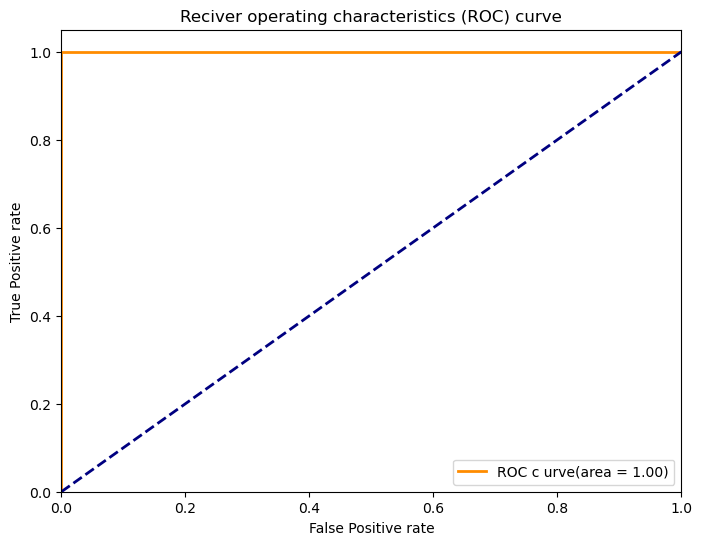

In [75]:
# plot roc-auc curve

plt.figure(figsize=(8,6)) # create a new figure with a specified size
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label = 'ROC c urve(area = %0.2f)' % roc_auc) # plot ROC curve
plt.plot([0,1],[0,1], color = 'navy', linewidth = 2, linestyle='--') # plot the diagonal line representing random gussing
plt.xlim([0.0, 1.0]) # set x-axis limits
plt.ylim([0.0, 1.05]) # set y_axis limits
plt.xlabel("False Positive rate") # set x_axis label
plt.ylabel("True Positive rate") # set y_axis label
plt.title("Reciver operating characteristics (ROC) curve")
plt.legend(loc="lower right") # add legend to the plot
plt.show() # show the plot

In [77]:
# cross validation >> 
# randomized search cv or grid search cv >> generic method with hyperparameter tunning
# logistic Regression cv
# kfold >> generic method

In [79]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold 

In [80]:
cv = KFold(n_splits = 5)

# shuffle : bool, default: false
# whether to shuffle the data before splitting into btaches.
# note that the sample withing each split will bot be shuffled

In [81]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [85]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train, y_train, cv = cv, scoring='accuracy')

In [86]:
scores

array([1., 1., 1., 1., 1.])